In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df = pd.read_csv('C:\\Users\\kisha\\Documents\\Quality-Prediction-MLOPs-Project\\artifacts\\data_ingestion\\winequality-red.csv')

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

C:\Users\kisha\AppData\Local\Temp\ipykernel_27056\1856741725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


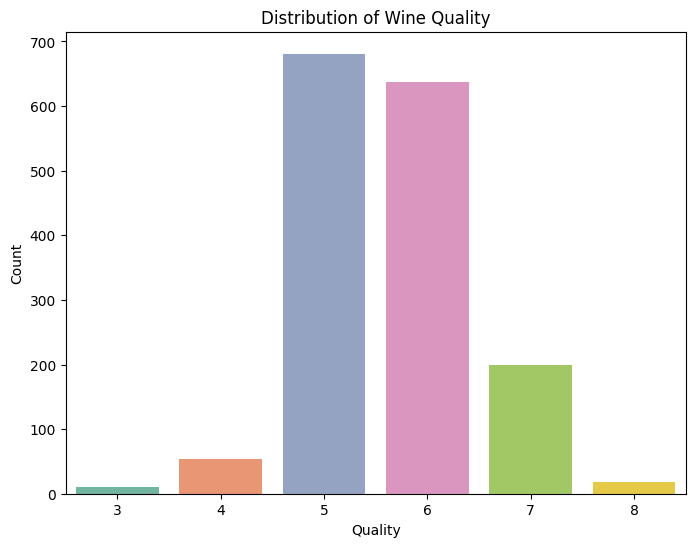

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


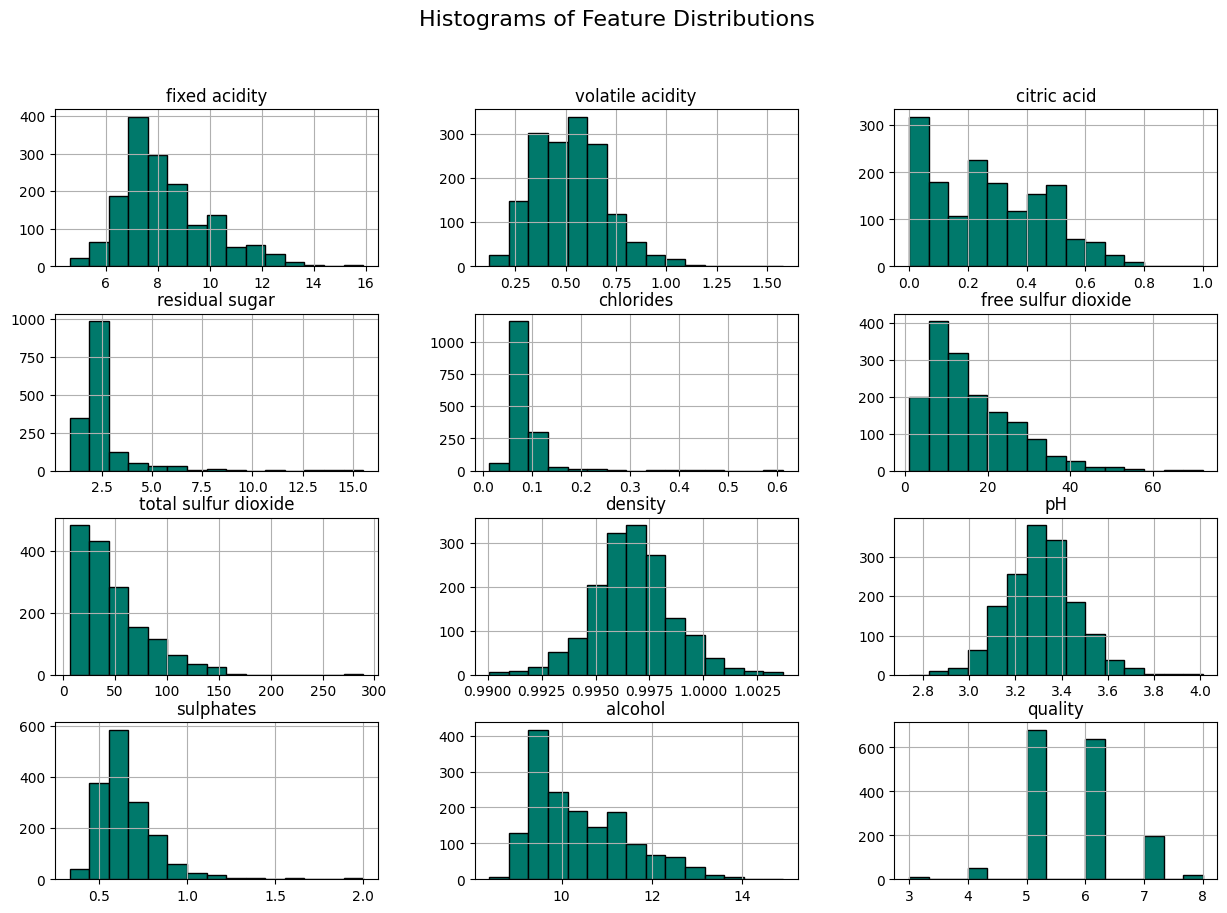

In [9]:
# Distribution plots for all features
df.hist(bins=15, figsize=(15, 10), color='#00796b', edgecolor='black')
plt.suptitle('Histograms of Feature Distributions', size=16)
plt.show()


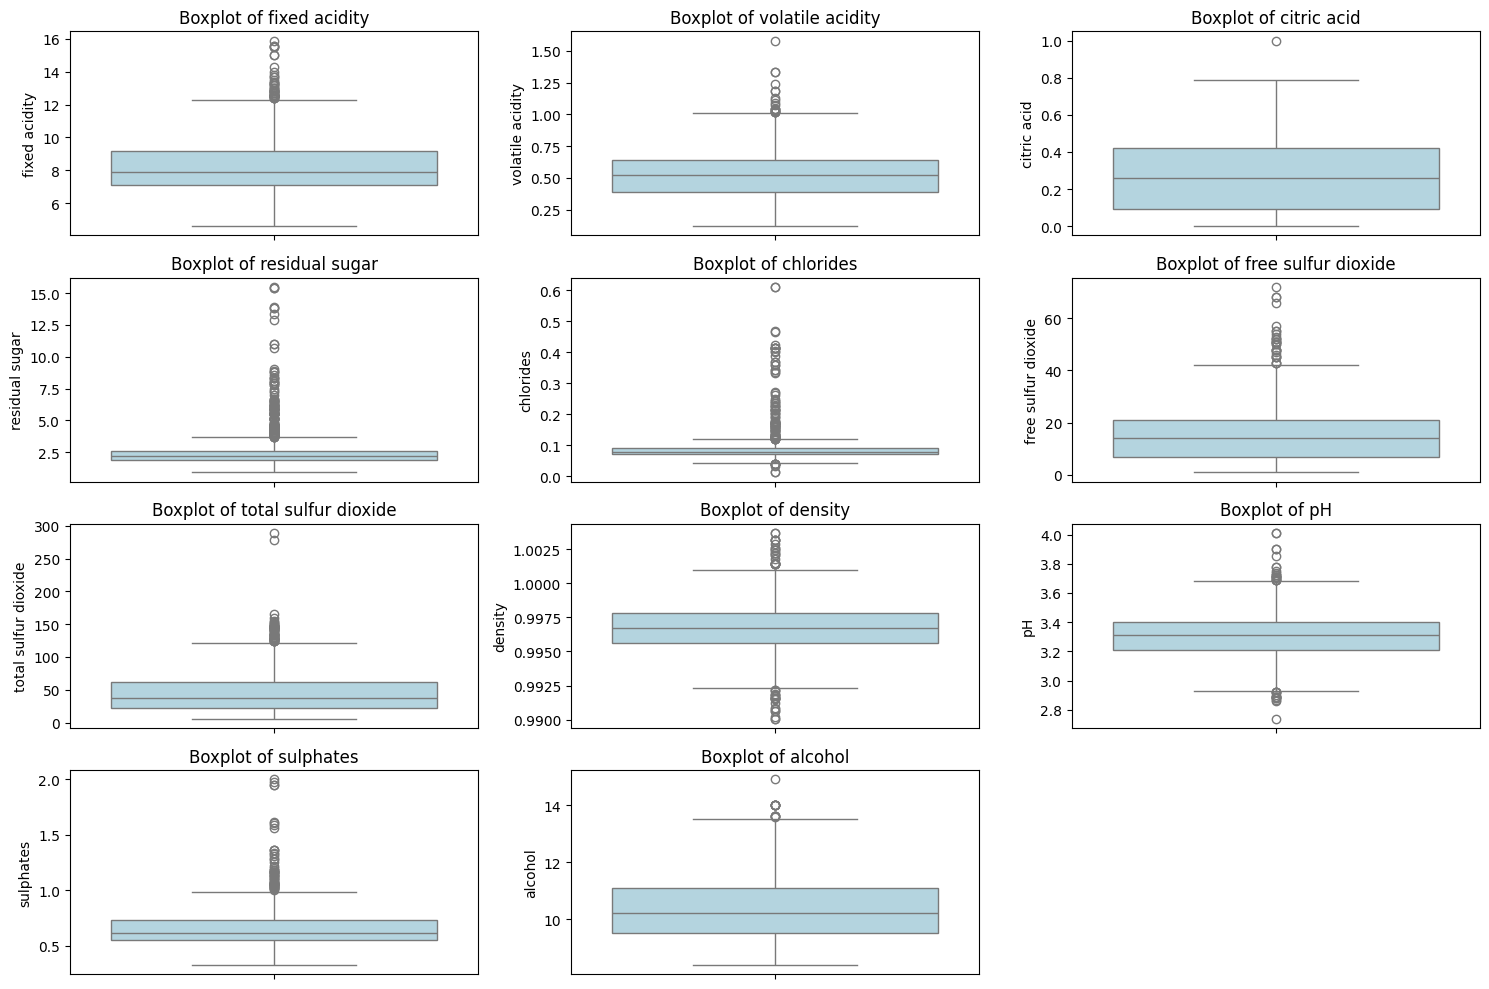

In [10]:
# Boxplots for all features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=col, data=df, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


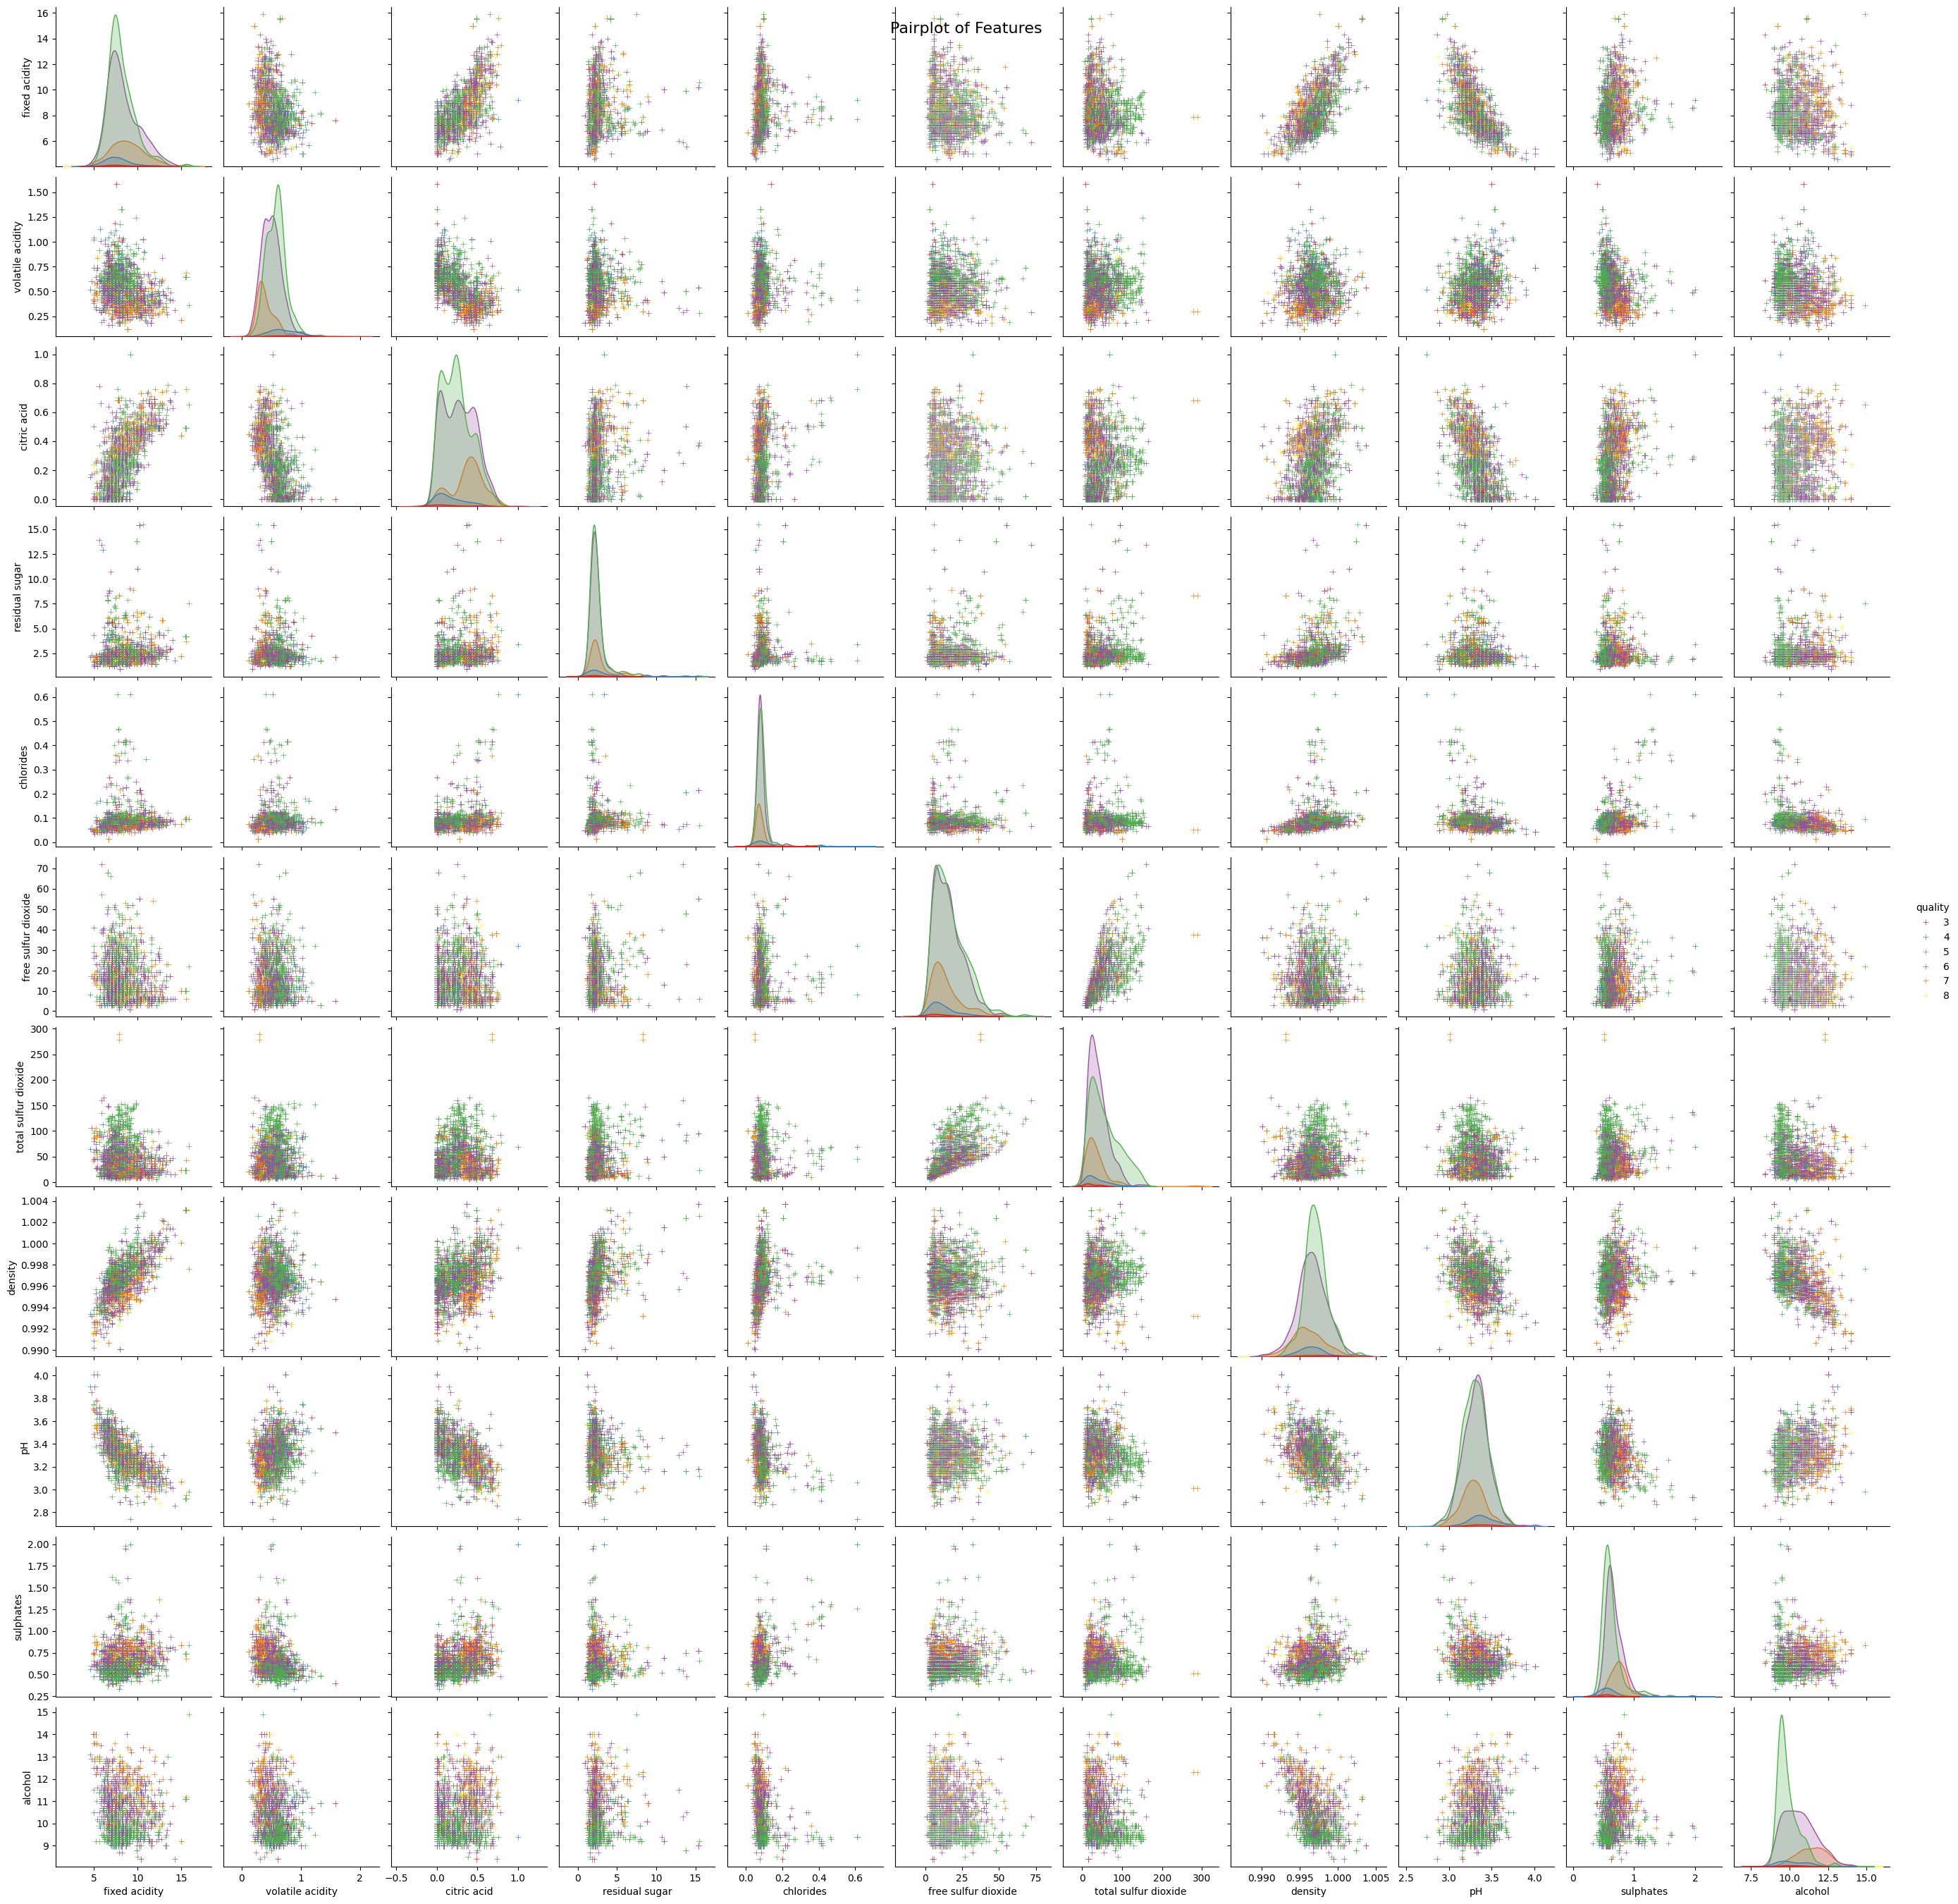

In [11]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='quality', palette='Set1', diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Features', size=16)
plt.show()

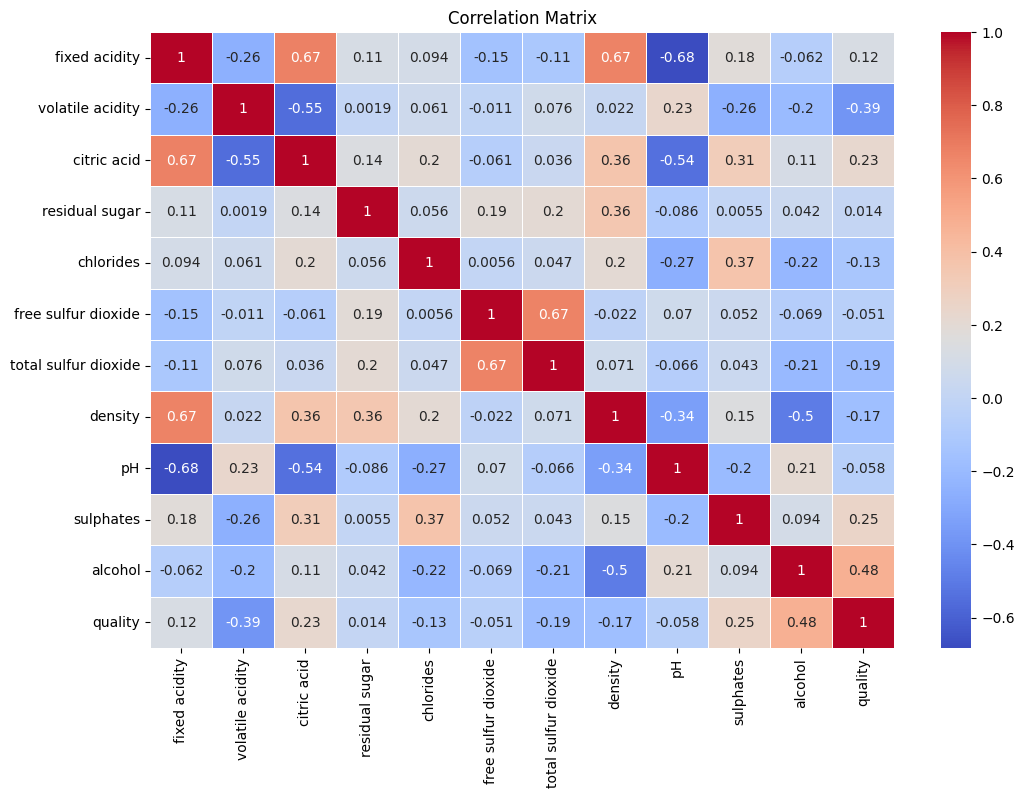

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Correlation of features with the target variable
print("\nCorrelation of features with the target variable (quality):")
print(corr_matrix['quality'].sort_values(ascending=False))



Correlation of features with the target variable (quality):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [14]:
# Checking skewness and kurtosis of the features
print("\nSkewness and Kurtosis of the features:")
for col in df.columns[:-1]:
    print(f'{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}')



Skewness and Kurtosis of the features:
fixed acidity: Skewness = 0.98, Kurtosis = 1.12
volatile acidity: Skewness = 0.67, Kurtosis = 1.22
citric acid: Skewness = 0.32, Kurtosis = -0.79
residual sugar: Skewness = 4.54, Kurtosis = 28.52
chlorides: Skewness = 5.68, Kurtosis = 41.58
free sulfur dioxide: Skewness = 1.25, Kurtosis = 2.01
total sulfur dioxide: Skewness = 1.51, Kurtosis = 3.79
density: Skewness = 0.07, Kurtosis = 0.93
pH: Skewness = 0.19, Kurtosis = 0.80
sulphates: Skewness = 2.43, Kurtosis = 11.68
alcohol: Skewness = 0.86, Kurtosis = 0.20


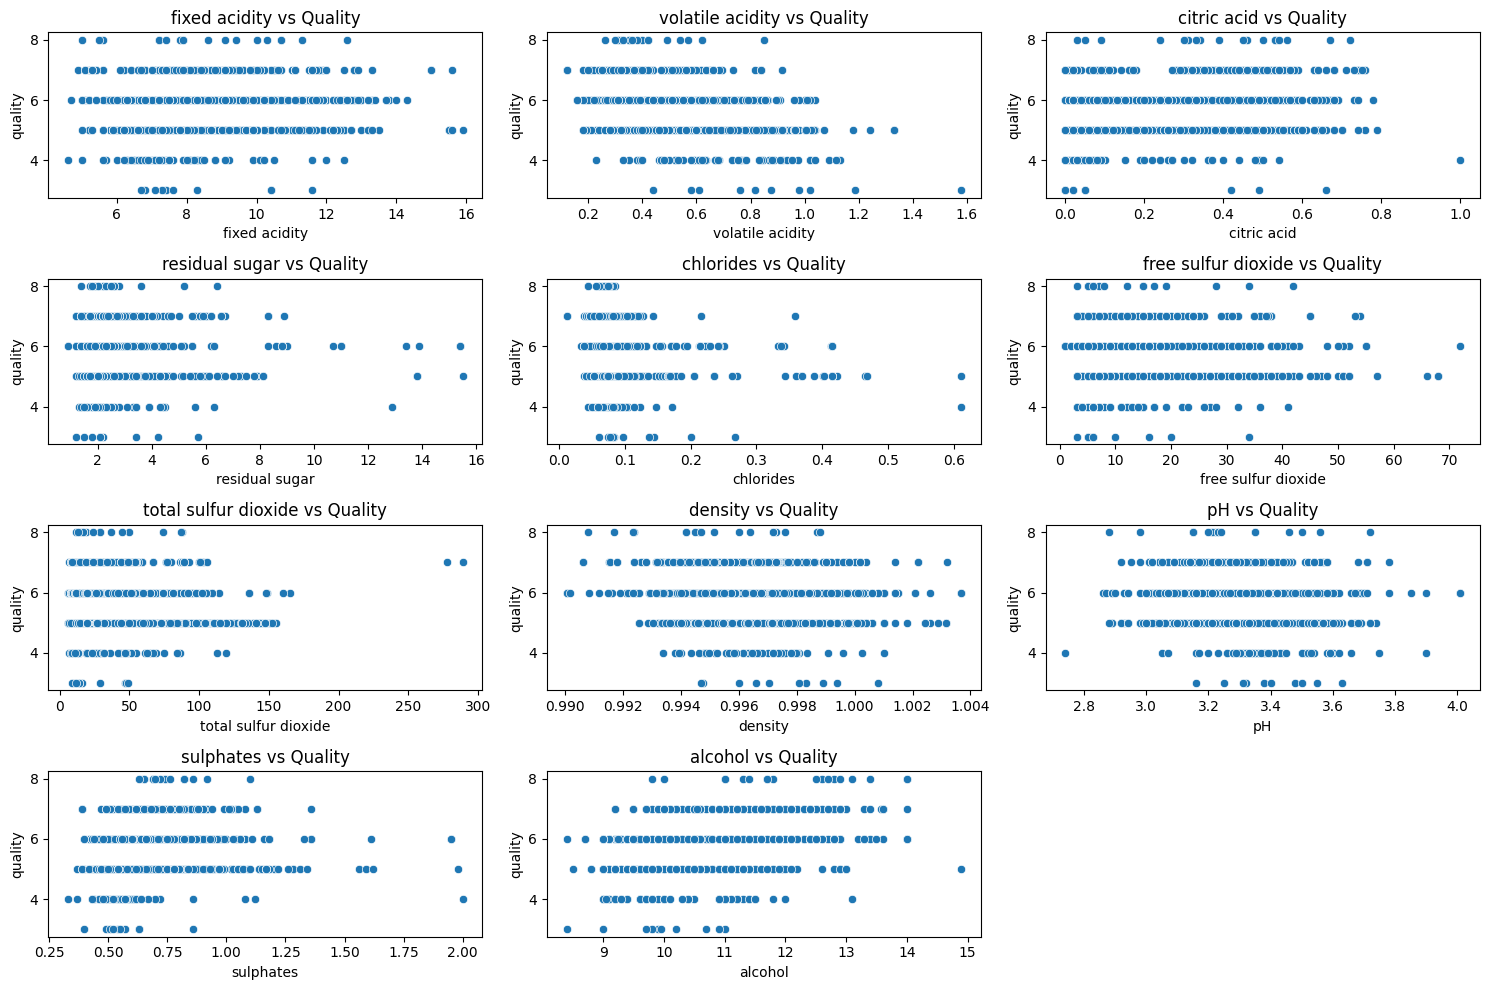

In [15]:
# Pairwise relationships between features and target using scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=col, y='quality', data=df)
    plt.title(f'{col} vs Quality')
plt.tight_layout()
plt.show()

In [16]:

print("\nSummary of findings:")
print("- Alcohol content and sulphates seem to have a positive correlation with quality.")
print("- Density, chlorides, and volatile acidity may negatively impact the quality.")
print("- The dataset is mostly clean with no missing values.")
print("- Some features exhibit skewness, which might need transformation during preprocessing.")


Summary of findings:
- Alcohol content and sulphates seem to have a positive correlation with quality.
- Density, chlorides, and volatile acidity may negatively impact the quality.
- The dataset is mostly clean with no missing values.
- Some features exhibit skewness, which might need transformation during preprocessing.


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [19]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
elastic_net_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 1.0], alphas=[0.1, 1.0, 10.0], cv=5, random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
elastic_net=ElasticNet(alpha=0.2, l1_ratio=0.1, random_state=42)

In [26]:
elastic_net_cv.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.1, random_state=42)

In [27]:
y_pred_en = elastic_net_cv.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)
y_pred_en2 = elastic_net.predict(X_test)


In [31]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
   
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
 
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.3f}')
    print(f'{model_name} - R-squared: {r2:.3f}')
    print(f'  Root Mean Squared Error (RMSE): {rmse:.3f}')
    print(f'  Mean Absolute Error (MAE): {mae:.3f}')
    print('-' * 30)

In [32]:
# Evaluate all models
evaluate_model(y_test, y_pred_en, 'ElasticNetCV')
evaluate_model(y_test, y_pred_rf, 'RandomForest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
evaluate_model(y_test, y_pred_en2, 'ElasticNet')


ElasticNetCV - Mean Squared Error: 0.461
ElasticNetCV - R-squared: 0.295
  Root Mean Squared Error (RMSE): 0.679
  Mean Absolute Error (MAE): 0.543
------------------------------
RandomForest - Mean Squared Error: 0.301
RandomForest - R-squared: 0.539
  Root Mean Squared Error (RMSE): 0.549
  Mean Absolute Error (MAE): 0.422
------------------------------
XGBoost - Mean Squared Error: 0.351
XGBoost - R-squared: 0.462
  Root Mean Squared Error (RMSE): 0.593
  Mean Absolute Error (MAE): 0.418
------------------------------
ElasticNet - Mean Squared Error: 0.480
ElasticNet - R-squared: 0.265
  Root Mean Squared Error (RMSE): 0.693
  Mean Absolute Error (MAE): 0.554
------------------------------


In [35]:

cv_scores_rf = cross_val_score(random_forest, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_xgb = cross_val_score(xgboost, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_en = cross_val_score(elastic_net_cv, X , y , cv =5, scoring='neg_mean_squared_error')

print(f'RandomForest CV Mean MSE: {np.mean(-cv_scores_rf):.3f}')
print(f'XGBoost CV Mean MSE: {np.mean(-cv_scores_xgb):.3f}')
print(f'elastic net CV Mean MSE: {np.mean(-cv_scores_en):.3f}')

RandomForest CV Mean MSE: 0.427
XGBoost CV Mean MSE: 0.474
elastic net CV Mean MSE: 0.473
